In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread, imread_collection, imshow, imshow_collection
from skimage.filters import threshold_otsu
from skimage.transform import resize, rotate

from scipy.signal import convolve2d
from scipy.fft import fft2, fftshift

# Working with text
## Demo

In [6]:
cat_image = imread('data/domestic-cat/dc (17).jpg')

In [7]:
cat_image.shape

(183, 275, 3)

In [8]:
cat_image[:, :, 0]

array([[ 64,  59,  51, ...,  39,  39,  39],
       [ 58,  55,  49, ...,  39,  39,  39],
       [ 50,  49,  46, ...,  37,  37,  37],
       ...,
       [118, 117, 124, ..., 164, 178, 190],
       [131, 125, 125, ..., 172, 186, 199],
       [139, 132, 129, ..., 177, 191, 203]], dtype=uint8)

In [13]:
all_domestic_cats_collection = imread_collection('data/domestic-cat/*') # get all images in the folder

In [14]:
domestic_cats = list(all_domestic_cats)

In [15]:
len(domestic_cats)

64

In [16]:
(domestic_cats[16] == cat_image).all()

True

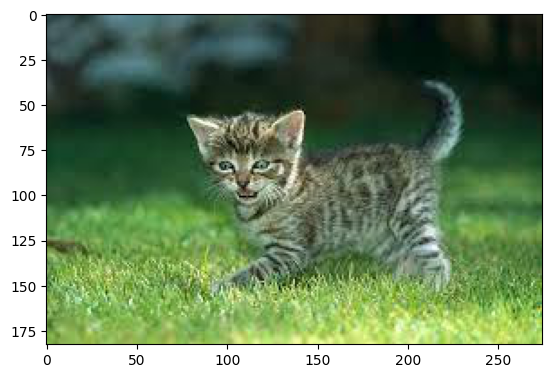

In [17]:
plt.imshow(cat_image)

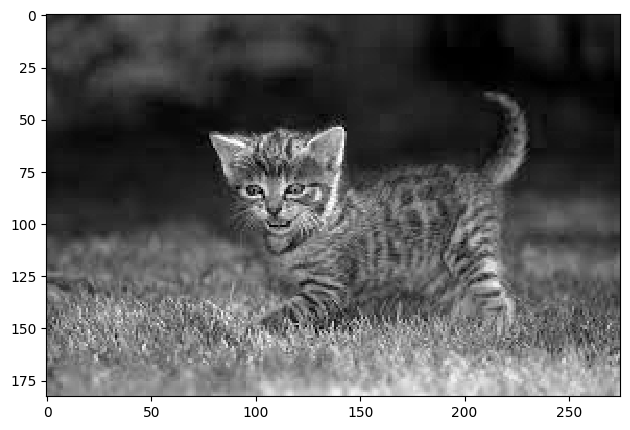

In [20]:
imshow(cat_image[:, :, 0])

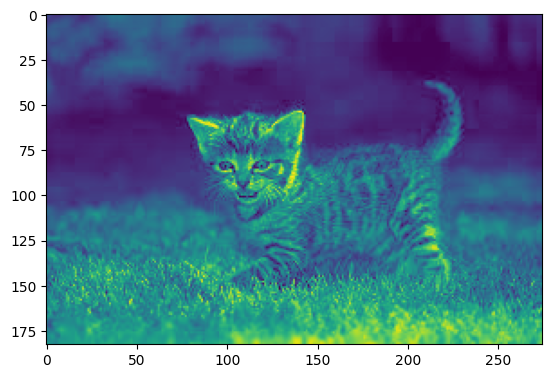

In [21]:
plt.imshow(cat_image[:, :, 0])

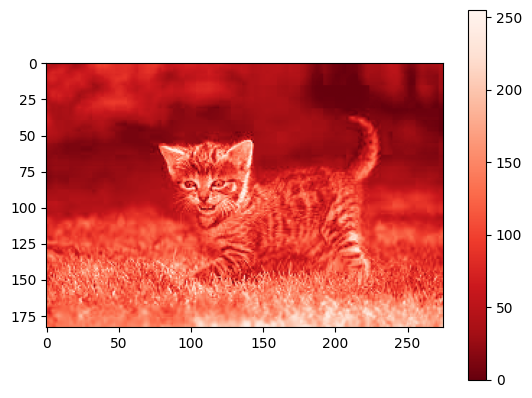

In [24]:
plt.imshow(cat_image[:, :, 0], cmap='Reds_r')
plt.colorbar()

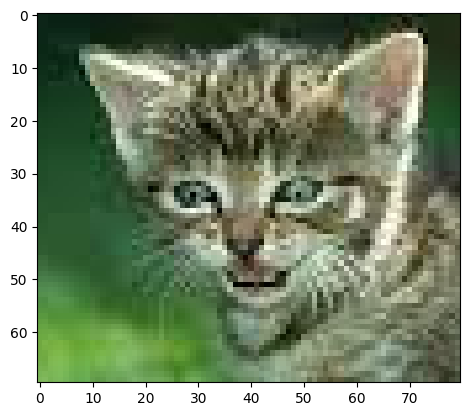

In [28]:
plt.imshow(cat_image[50:120, 70:150])

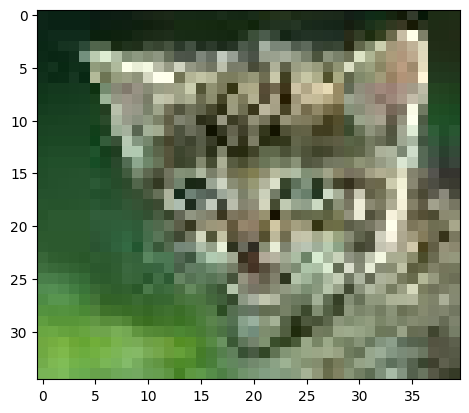

In [29]:
plt.imshow(cat_image[50:120:2, 70:150:2]) # get the pixels in two. The image is four times more smal then origin

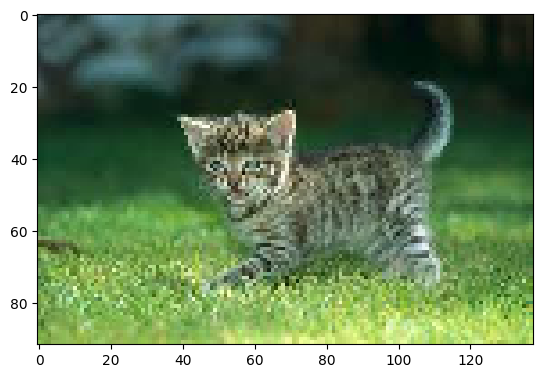

In [30]:
plt.imshow(cat_image[::2, ::2]) # get the pixels in two. The image is four times more smal then origin

In [31]:
cat_image.dtype

dtype('uint8')

In [32]:
cat_image.astype(float).dtype

dtype('float64')

In [35]:
(cat_image + 500).astype('uint8')

array([[[ 52,  76,  78],
        [ 47,  71,  73],
        [ 39,  63,  65],
        ...,
        [ 27,  29,  15],
        [ 27,  29,  15],
        [ 27,  29,  15]],

       [[ 46,  70,  72],
        [ 43,  67,  69],
        [ 37,  61,  63],
        ...,
        [ 27,  29,  15],
        [ 27,  29,  15],
        [ 27,  29,  15]],

       [[ 38,  62,  64],
        [ 37,  61,  63],
        [ 34,  58,  60],
        ...,
        [ 25,  27,  13],
        [ 25,  27,  13],
        [ 25,  27,  13]],

       ...,

       [[106, 157,  52],
        [105, 156,  53],
        [112, 160,  58],
        ...,
        [152, 189,  73],
        [166, 203,  87],
        [178, 215,  99]],

       [[119, 170,  65],
        [113, 164,  61],
        [113, 161,  59],
        ...,
        [160, 195,  79],
        [174, 209,  93],
        [187, 222, 106]],

       [[127, 178,  73],
        [120, 171,  68],
        [117, 165,  63],
        ...,
        [165, 198,  83],
        [179, 212,  97],
        [191, 224, 109]]

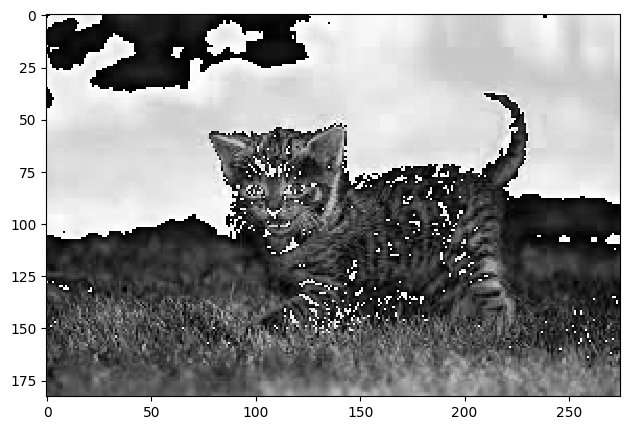

In [39]:
imshow((cat_image[:, :, 0] + 200).astype('uint8'))

C:\Users\Nikolay\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


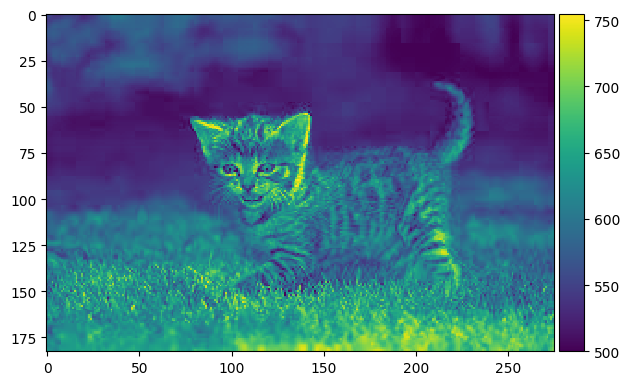

In [40]:
imshow(cat_mage[:, :, 0] + 500) # не намира минимума и максимума в изображението.

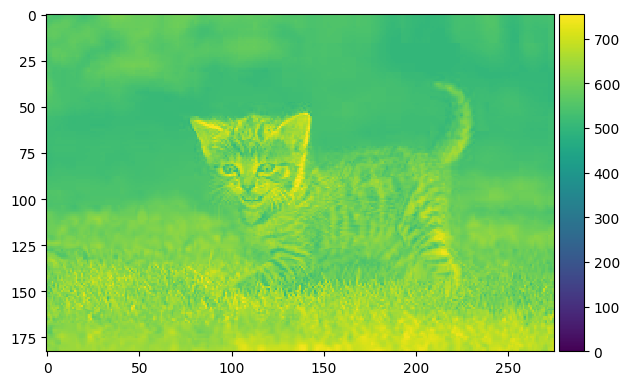

In [41]:
imshow(cat_mage[:, :, 0] + 500, vmin=0, vmax=256+500) # с корегирани мин и маь

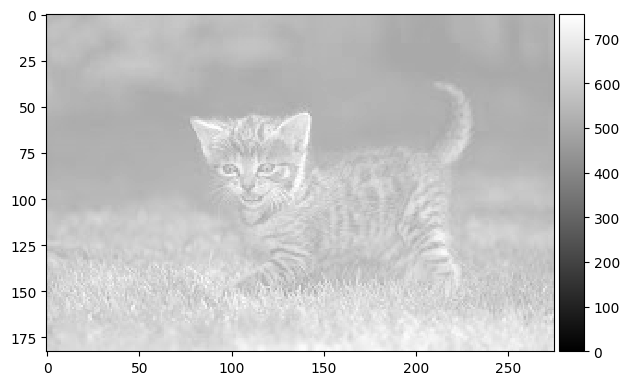

In [43]:
imshow(cat_mage[:, :, 0] + 500, vmin=0, vmax=256+500, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [500..755].


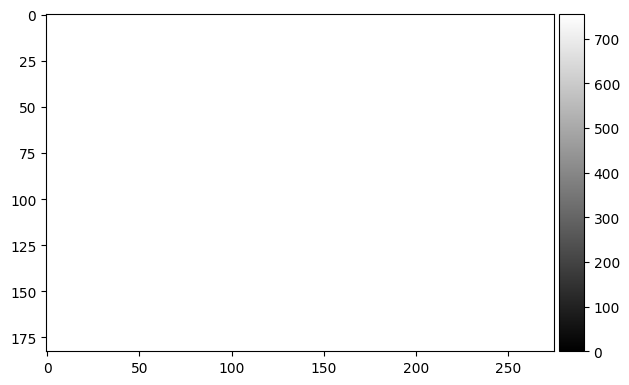

In [45]:
imshow(cat_mage + 500, vmin=0, vmax=256+500, cmap='gray') # при rbg изображение очаква стойности в диапазона 0 - 255

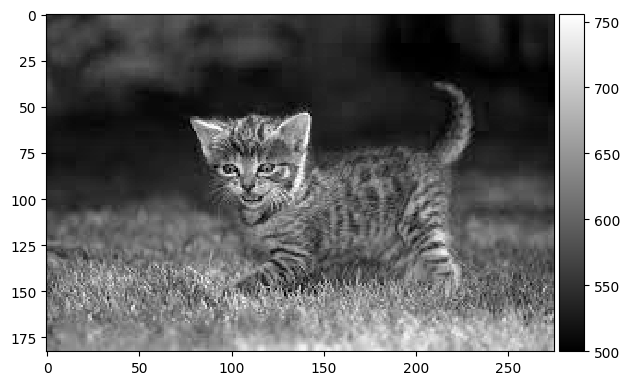

In [47]:
imshow(cat_mage[:, :, 0] + 500, vmin=500, vmax=256+500, cmap='gray') # като се коригира диапазомна изображението не е преекспонирано

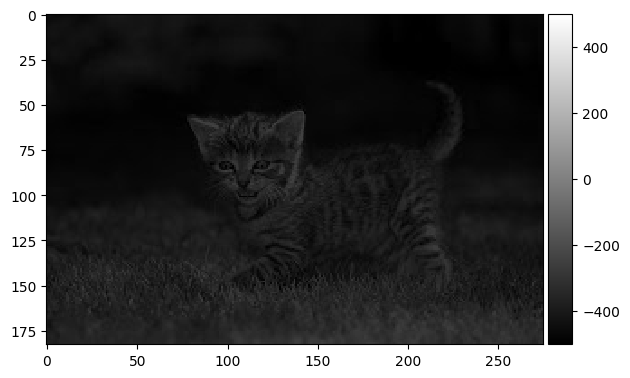

In [48]:
imshow((cat_image[:, :, 0].astype(int) - 500), cmap='gray') # с отрицателни стойности 

(array([[32., 41., 44., ...,  0.,  0.,  0.],
        [32., 43., 42., ...,  0.,  0.,  0.],
        [32., 44., 43., ...,  0.,  0.,  0.],
        ...,
        [59., 33., 28., ...,  5.,  0.,  0.],
        [59., 33., 31., ...,  9.,  1.,  0.],
        [59., 32., 30., ...,  9.,  0.,  0.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 275 BarContainer objects>)

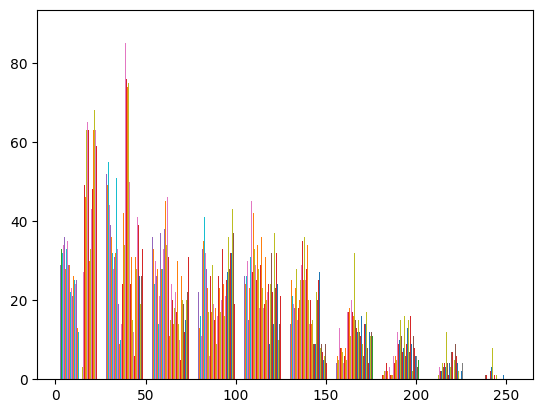

In [50]:
plt.hist(cat_image[:, :, 0]) # прави отделна хистограм за всеки ред и неможе да се ползва така

In [58]:
cat_image[:, :, 0].ravel().shape # ravel събира редовете в един масив

(50325,)

In [59]:
red_chanel_for_hist_ravel = cat_image[:, :, 0].ravel()

In [56]:
cat_image[:, :, 0].reshape(-1, 1).shape # подобно на ravel но е вектор стълб - двумерен масив

(50325, 1)

In [60]:
red_chanel_for_hist_reshape = cat_image[:, :, 0].reshape(-1, 1)

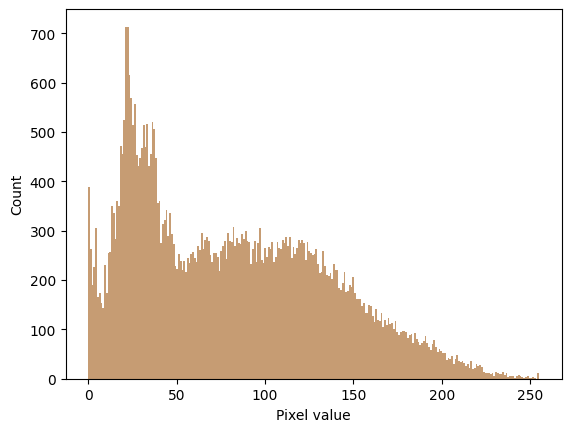

In [68]:
plt.hist(red_chanel_for_hist_ravel, bins=256, alpha=0.5)
plt.hist(red_chanel_for_hist_reshape, bins=256, alpha=0.5) # both hist are equal

plt.xlabel('Pixel value')
plt.ylabel('Count')

plt.show()

In [74]:
red_chanel_for_hist_ravel = cat_image[:, :, 0].ravel()
green_chanel_for_hist_ravel = cat_image[:, :, 1].ravel()
blue_chanel_for_hist_ravel = cat_image[:, :, 2].ravel()

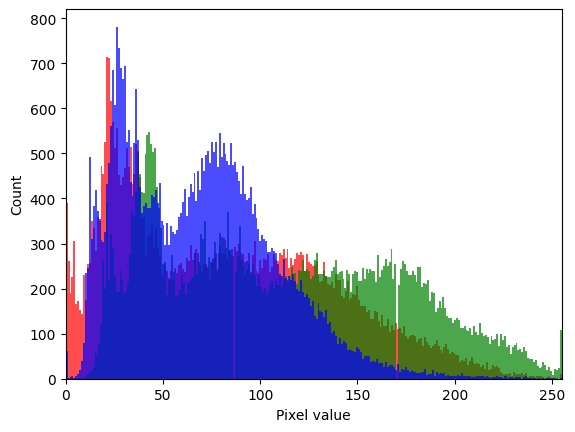

In [76]:
plt.hist(red_chanel_for_hist_ravel, bins=256, color='red', alpha=0.7)
plt.hist(green_chanel_for_hist_ravel, bins=256, color='green', alpha=0.7)
plt.hist(blue_chanel_for_hist_ravel, bins=256, color='blue', alpha=0.7)

plt.xlabel('Pixel value')
plt.ylabel('Count')

plt.xlim(0, 255)
plt.show()

In [81]:
cat_image_light = imread('data/domestic-cat/dc (58).jpg')

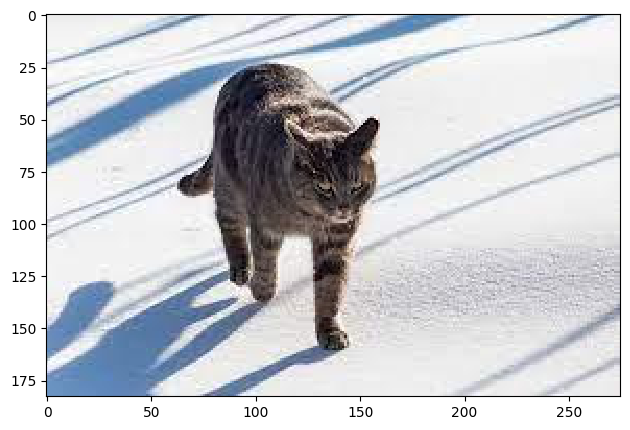

In [82]:
imshow(cat_image_light)

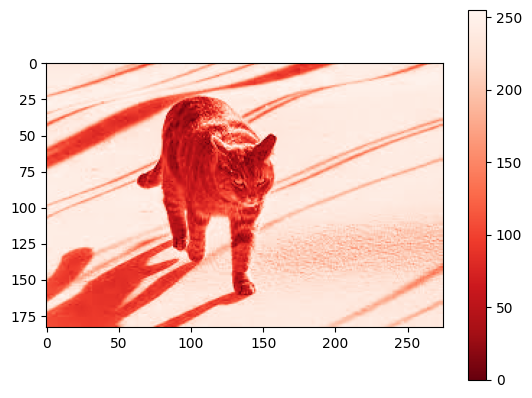

In [83]:
plt.imshow(cat_image_light[:, :, 0], cmap='Reds_r')
plt.colorbar()

In [84]:
light_red_chanel_for_hist_ravel = cat_image_light[:, :, 0].ravel()
light_green_chanel_for_hist_ravel = cat_image_light[:, :, 1].ravel()
light_blue_chanel_for_hist_ravel = cat_image_light[:, :, 2].ravel()

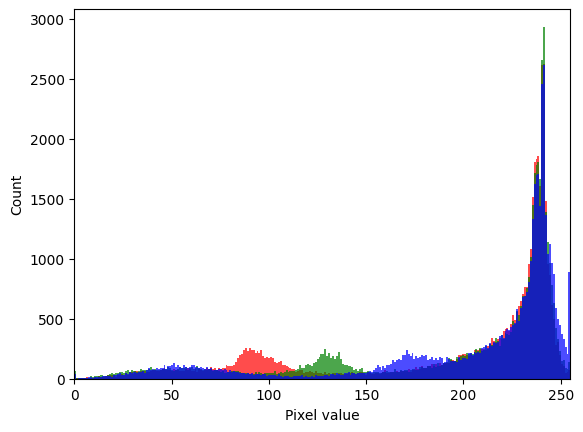

In [85]:
plt.hist(light_red_chanel_for_hist_ravel, bins=256, color='red', alpha=0.7)
plt.hist(light_green_chanel_for_hist_ravel, bins=256, color='green', alpha=0.7)
plt.hist(light_blue_chanel_for_hist_ravel, bins=256, color='blue', alpha=0.7)

plt.xlabel('Pixel value')
plt.ylabel('Count')

plt.xlim(0, 255)
plt.show()

In [87]:
cat_image.mean(axis=2).shape # axis задава по кое измерение да се извършва операцията, 0 е по редове, 1 е по колони, 2 по канали. Това е за изображения

(183, 275)

In [88]:
cat_image.mean(axis=2)

array([[ 80.66666667,  75.66666667,  67.66666667, ...,  35.66666667,
         35.66666667,  35.66666667],
       [ 74.66666667,  71.66666667,  65.66666667, ...,  35.66666667,
         35.66666667,  35.66666667],
       [ 66.66666667,  65.66666667,  62.66666667, ...,  33.66666667,
         33.66666667,  33.66666667],
       ...,
       [117.        , 116.66666667, 122.        , ..., 150.        ,
        164.        , 176.        ],
       [130.        , 124.66666667, 123.        , ..., 156.66666667,
        170.66666667, 183.66666667],
       [138.        , 131.66666667, 127.        , ..., 160.66666667,
        174.66666667, 186.66666667]])

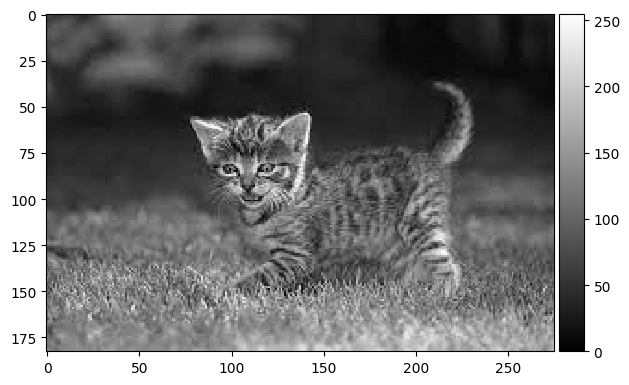

In [92]:
imshow(cat_image.mean(axis=2), cmap='gray', vmin=0, vmax=255) # това е осредно избражение по канали на изображение

In [100]:
red = cat_image[:, :, 0]
green = cat_image[:, :, 1]
blue = cat_image[:, :, 2]

cat_image_gray = 0.299 * red + 0.587 * green + 0.114 * blue # gama corection начин за промяна на изибражения

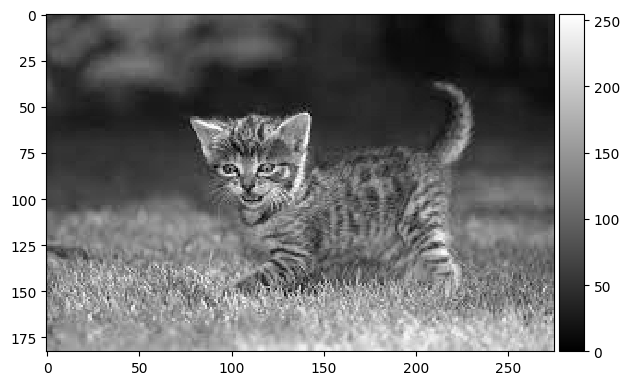

In [99]:
imshow(cat_image_gray, cmap='grey', vmin=0, vmax=255)

In [102]:
cat_image_masked = cat_image.copy()

In [107]:
cat_image_masked[50:120, 70:150] = 0 # това е маскиране

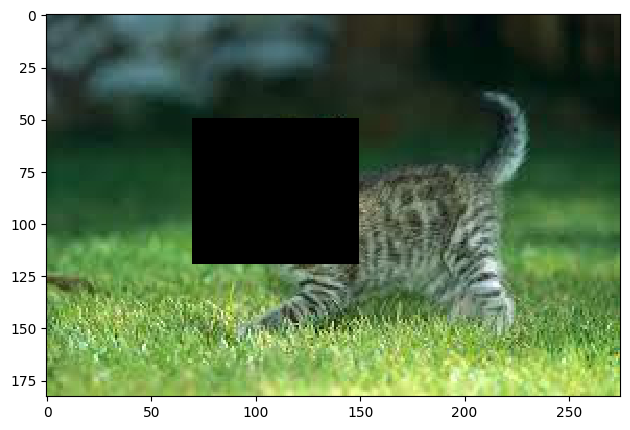

In [106]:
imshow(cat_image_masked)

In [112]:
cat_image_normalized = cat_image / 255.0

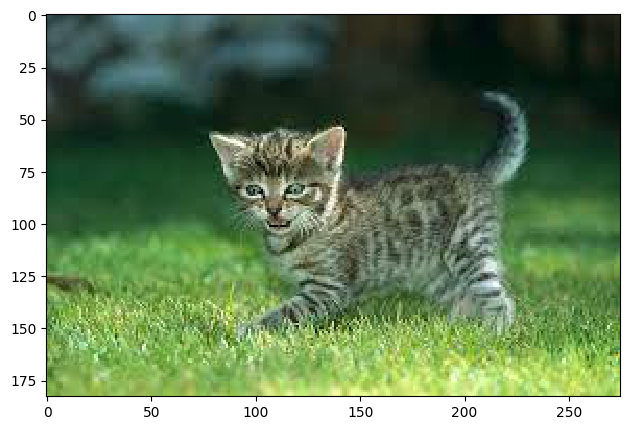

In [113]:
imshow(cat_image_normalized)

In [135]:
conv_filter = np.array([
    [1, 0, 1]
    ,[0, 1, 0]
    ,[1, 0, 1]
    
])

In [134]:
conv_min_filter = np.array([
    [1, 1, 1]
    ,[1, 1, 1]
    ,[1, 1, 1]
    
]) # мин филтъра се сътои от единици и придава размазан вид на изображението

In [133]:
conv_min_filter_bigger = np.array([
    [1, 1, 1, 1, 1]
    ,[1, 1, 1, 1, 1]
    ,[1, 1, 1, 1, 1]
    ,[1, 1, 1, 1, 1]
    ,[1, 1, 1, 1, 1]
])

In [132]:
conv_filter_one_matrix = np.eye(5)

In [137]:
conv_filter_one_matrix

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [138]:
result = convolve2d(cat_image[:, :, 0], conv_filter, mode='same')
result_min_filter = convolve2d(cat_image[:, :, 0], conv_min_filter, mode='same')
result_min_filter_bigger = convolve2d(cat_image[:, :, 0], conv_min_filter_bigger, mode='same')
result_one_matrix_filter = convolve2d(cat_image[:, :, 0], conv_filter_one_matrix, mode='same')


In [130]:
result.min(), result.max()

(0, 1202)

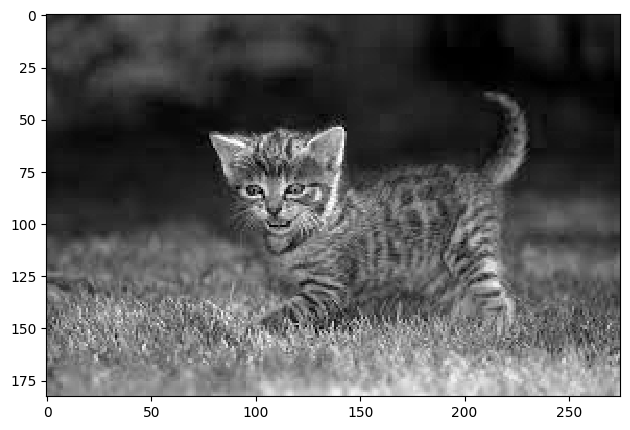

C:\Users\Nikolay\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


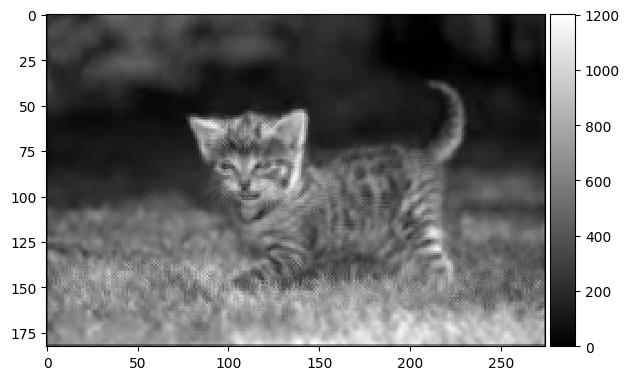

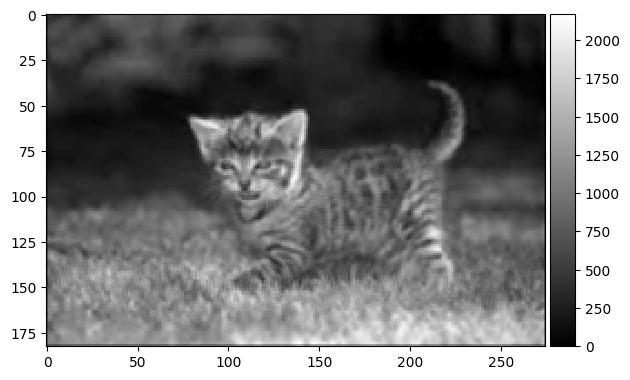

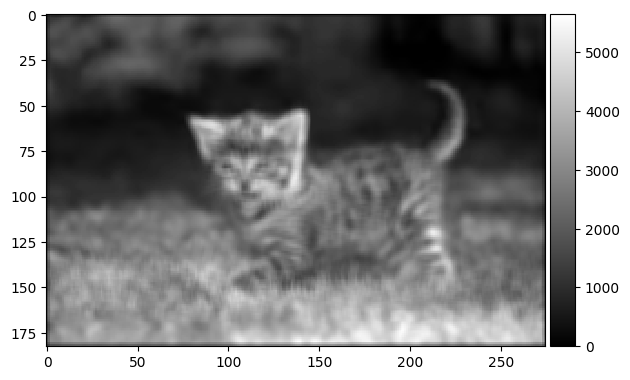

C:\Users\Nikolay\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


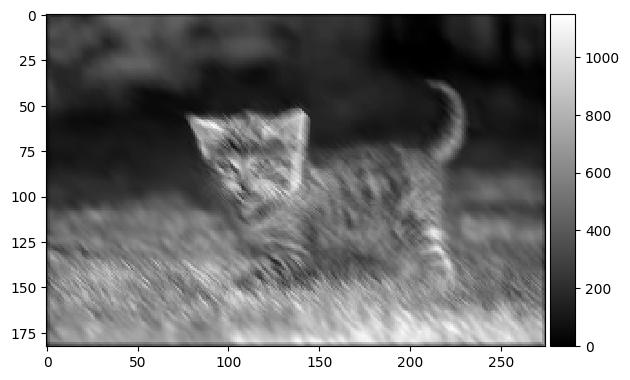

In [139]:
imshow(cat_image[:, :, 0], cmap='gray')
plt.show()

imshow(result, cmap='gray')
plt.show()

imshow(result_min_filter, cmap='gray')
plt.show()

imshow(result_min_filter_bigger, cmap='gray')
plt.show()

imshow(result_one_matrix_filter, cmap='gray')
plt.show()

In [140]:
cat_image_binary = cat_image.copy()

In [141]:
cat_image.mean()

86.89094883258818

In [146]:
cat_image_binary[cat_image_binary < 87] = 0
cat_image_binary[cat_image_binary >= 87] = 255 # така се прави бинарно изображение

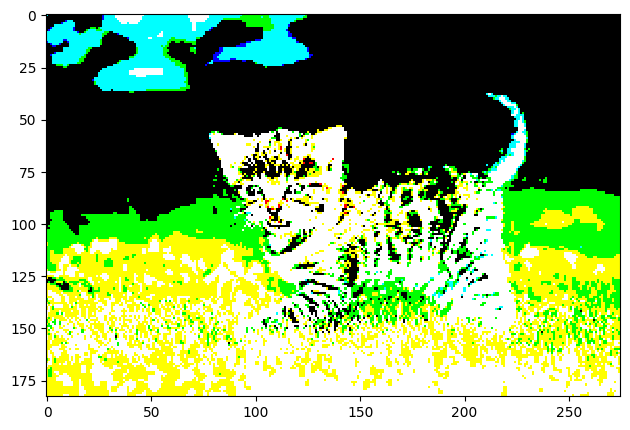

In [154]:
imshow(cat_image_binary, cmap='gray')

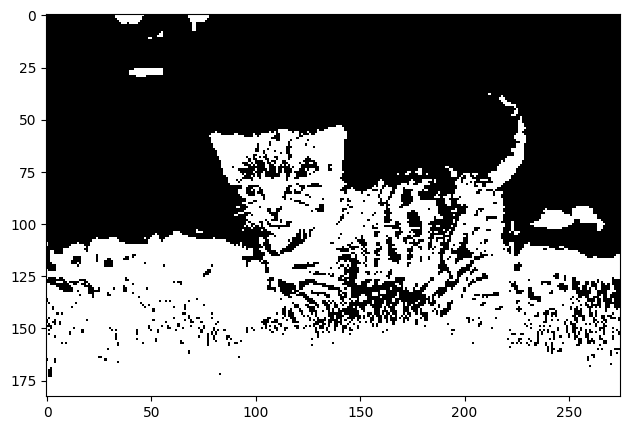

In [158]:
imshow(cat_image_binary[:, :, 0], cmap='gray') # това е бинарно изображение - само черно и бяло, без сиво

In [161]:
threshold_otsu(cat_image[:, :, 0])

88

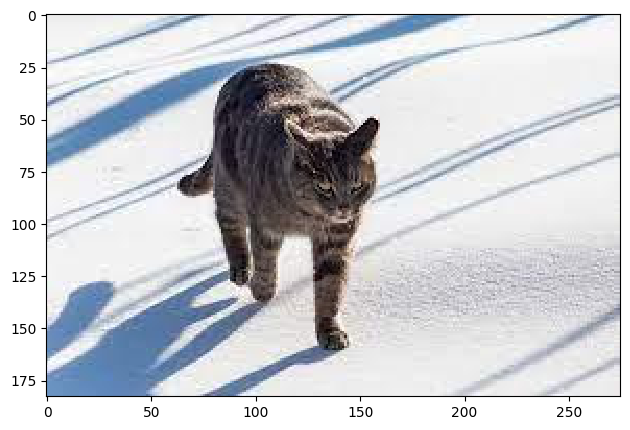

In [162]:
imshow(domestic_cats[57])

In [163]:
threshold_otsu(domestic_cats[57][:, :, 0])

156

In [164]:
cat_image_57_binary = domestic_cats[57].copy()[:, :, 0]

In [165]:
cat_image_57_binary[cat_image_57_binary <= 156] = 0
cat_image_57_binary[cat_image_57_binary > 156] = 255

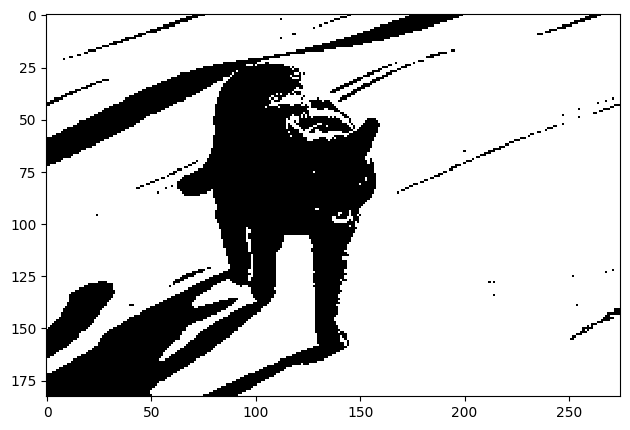

In [167]:
imshow(cat_image_57_binary)

In [173]:
result = 0.5 * domestic_cats[0].astype(int) + 0.5 * domestic_cats[1].astype(int)

In [174]:
result.min(), result.max()

(4.5, 249.5)

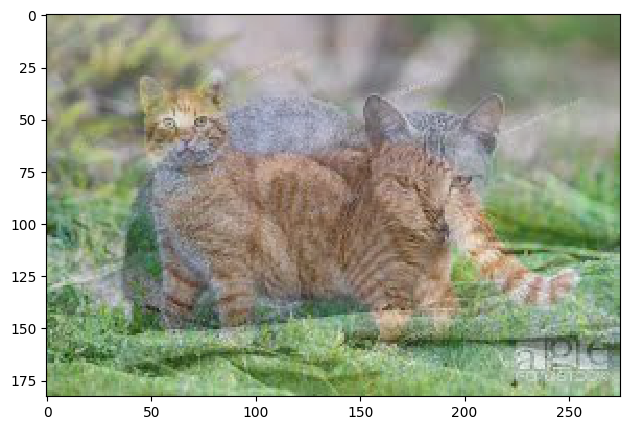

In [176]:
imshow(result.astype('uint8'))

C:\Users\Nikolay\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


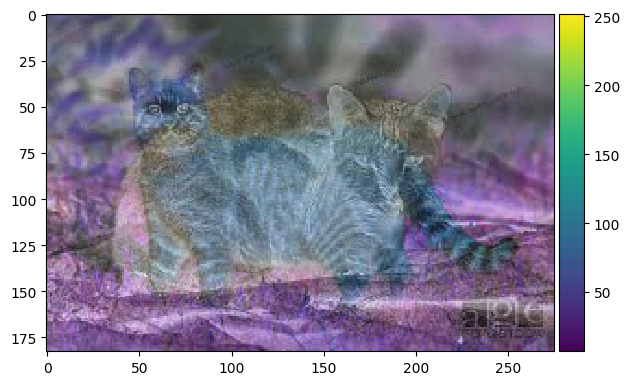

In [178]:
imshow(256 - result.astype('uint8'))

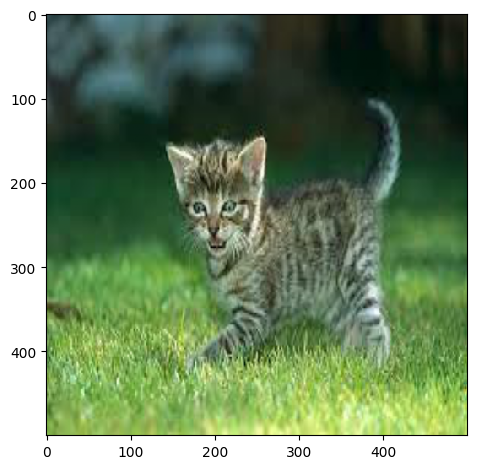

In [180]:
imshow(resize(cat_image, (500, 500)))

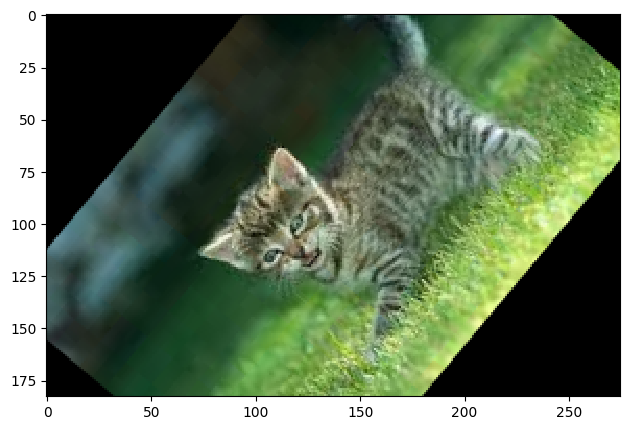

In [181]:
imshow(rotate(cat_image, 50))

In [184]:
fft2(cat_image).shape

(183, 275, 3)

In [186]:
fftshift(fft2(cat_image[:, :, 0]))

array([[  695.05324429 +356.66837233j,  1676.69391103 +378.02819553j,
          624.40351846 -728.4800673j , ...,
          183.17355755+1018.03806488j,  -234.33695557+1328.9075511j ,
         1988.12638703+1036.6435046j ],
       [  199.22044879+1879.20305796j,   173.97967035+1896.883612j  ,
         1691.18565781-1506.14372095j, ...,
        -2912.9629372 +1331.14722949j,   924.86236554 +822.07364332j,
        -1220.61717103 +453.41342251j],
       [-2119.9869582  +635.30723448j,  -302.8581566  -361.49818836j,
         -236.65535991+1838.66820455j, ...,
          374.62172957-1422.38519151j, -1484.25166642 -353.12743154j,
         -466.47266338 +683.95680034j],
       ...,
       [ -466.47266338 -683.95680034j, -1484.25166642 +353.12743154j,
          374.62172957+1422.38519151j, ...,
         -236.65535991-1838.66820455j,  -302.8581566  +361.49818836j,
        -2119.9869582  -635.30723448j],
       [-1220.61717103 -453.41342251j,   924.86236554 -822.07364332j,
        -2912.9629372 

In [189]:
fft_amplitudes = np.abs(fftshift(fft2(cat_image[:, :, 0]))) # при комплексни числа np.abs() връща модула

C:\Users\Nikolay\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


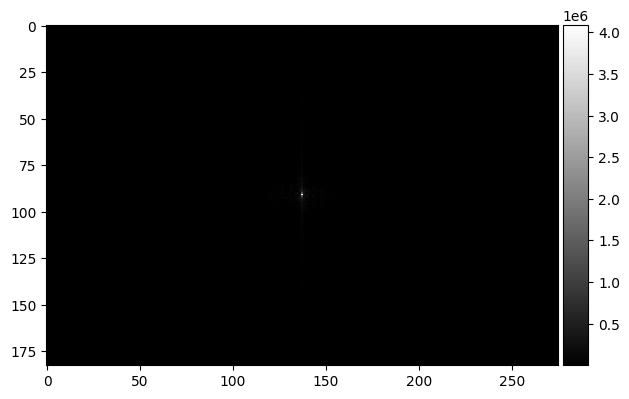

In [190]:
imshow(fft_amplitudes, cmap='gray')

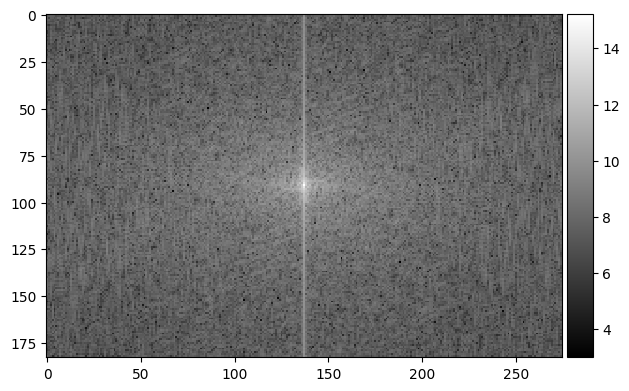

In [192]:
imshow(np.log(fft_amplitudes), cmap='gray')

In [194]:
cat_image.shape

(183, 275, 3)